# **Project 3**, APS1070 Fall 2023
#### **PCA [11 marks]**
**Deadline: Nov 17th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

In this project we work on a [temperature dataset](https://berkeleyearth.org/data/) that reports the average earth surface temperature for different cities for each month over the years 1992-2006.

Please fill out the following:


*   **Name**:Chuhan Chen
*   **Student number**: 1006057213



### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Part 1: Getting started with GitHub [1 Mark + 1 Mark Git Submission]

This first part of the project assignment is to be completed independently from Parts 2 - 5. In this part you will be completing some coding tasks and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac:
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/BWpQKQJt to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS1070-UofT/project-3-part-1-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**
https://github.com/APS1070-UofT/project-3-part-1-vickyy810

 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS1070-UofT/project-3-part-1-*********
```

 5. A new folder should be created in your directory similar to:
```
C:\aps1070\project-3-part-1-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions.

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded.

 8. To submit your work, follow:
```
cd <your assignment folder>
git add F23_Project_3_Part_1_git.ipynb
git commit -m “Final Submission”
git push
```
If you have any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.**

**https://github.com/APS1070-UofT/project-3-part-1-vickyy810**

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (180, 180).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.25]**
4. How many PCs do you need to cover 99% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first two PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

## Q1

In [ ]:
import pandas as pd
data_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/TemperaturesbyCity.csv',
    index_col=0
)
print(data_raw)

          1992-01-01  1992-02-01  1992-03-01  1992-04-01  1992-05-01  \
City                                                                   
A Coruña       7.053       9.548      11.154      12.322      15.951   
Aachen         1.492       3.867       6.179       8.231      14.977   
Aalborg        3.148       3.891       4.578       5.868      13.822   
Aba           26.090      28.293      28.755      28.334      27.305   
Abadan        10.283      13.018      15.789      23.541      29.505   
...              ...         ...         ...         ...         ...   
Århus          3.148       3.891       4.578       5.868      13.822   
Çorlu          3.563       2.850       6.930      11.577      14.750   
Çorum         -3.209      -2.546       3.744       9.299      12.780   
Öskemen       -9.365     -12.908      -9.790       3.892      12.488   
Ürümqi       -12.445      -9.708      -1.082      11.655      16.550   

          1992-06-01  1992-07-01  1992-08-01  1992-09-01  1992-

In [ ]:
### YOUR CODE HERE ###
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_raw)

df_mean = np.mean(df_scaled, axis=0)
df_cov = (df_scaled - df_mean).T.dot((df_scaled - df_mean)) / (df_scaled.shape[0]-1)

In [ ]:
df_cov

array([[1.00029011, 0.99268854, 0.96789139, ..., 0.86857023, 0.96788687,
        0.9928223 ],
       [0.99268854, 1.00029011, 0.97955289, ..., 0.8810364 , 0.97015331,
        0.98397652],
       [0.96789139, 0.97955289, 1.00029011, ..., 0.91140956, 0.96641666,
        0.96294613],
       ...,
       [0.86857023, 0.8810364 , 0.91140956, ..., 1.00029011, 0.95453146,
        0.87196505],
       [0.96788687, 0.97015331, 0.96641666, ..., 0.95453146, 1.00029011,
        0.97085605],
       [0.9928223 , 0.98397652, 0.96294613, ..., 0.87196505, 0.97085605,
        1.00029011]])

In [ ]:
df_cov.shape

(180, 180)

## Q2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def get_sorted_eigen(df_cov):
    eigenvalues, eigenvectors = np.linalg.eigh(df_cov)

    indice = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[indice]
    eigenvectors = eigenvectors[:, indice]
    return eigenvalues, eigenvectors

## Q3

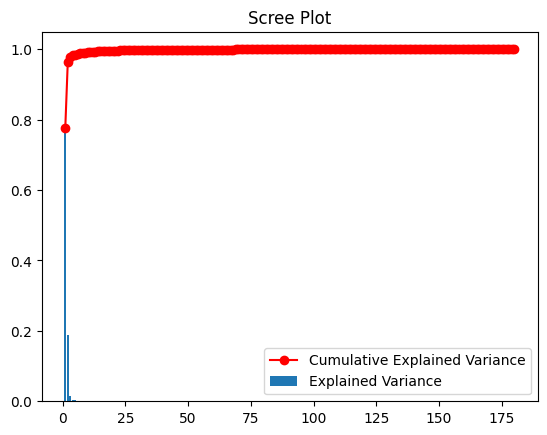

In [ ]:
eigenvalues, eigenvectors = get_sorted_eigen(df_cov)
eigenvalues = eigenvalues/np.sum(eigenvalues)
cumsum_eigenvalues = np.cumsum(eigenvalues)

plt.plot(np.arange(1, len(eigenvalues)+1), cumsum_eigenvalues, 'ro-', label='Cumulative Explained Variance')
plt.bar(np.arange(1, len(eigenvalues)+1), eigenvalues, label='Explained Variance')
plt.legend()
plt.title('Scree Plot')
plt.show()

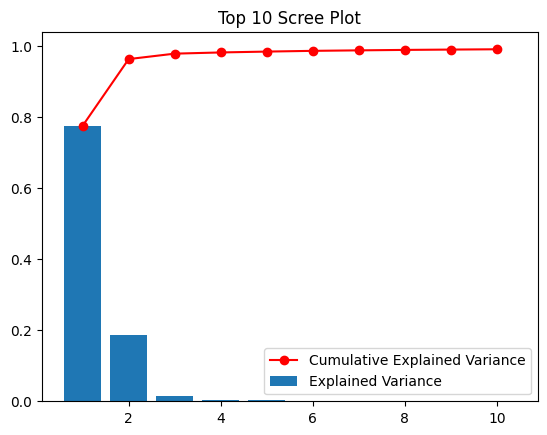

In [ ]:
eigenvalues, eigenvectors = get_sorted_eigen(df_cov)
eigenvalues = eigenvalues/np.sum(eigenvalues)
eigenvalues = eigenvalues[:10]
cumsum_eigenvalues = np.cumsum(eigenvalues)

plt.plot(np.arange(1, len(eigenvalues)+1), cumsum_eigenvalues, 'ro-', label='Cumulative Explained Variance')
plt.bar(np.arange(1, len(eigenvalues)+1), eigenvalues, label='Explained Variance')
plt.legend()
plt.title('Top 10 Scree Plot')
plt.show()

## Q4

In [ ]:
eigenvalues, eigenvectors = get_sorted_eigen(df_cov)
eigenvalues = eigenvalues/np.sum(eigenvalues)
cumsum_eigenvalues = np.cumsum(eigenvalues)

num_pc = np.where(cumsum_eigenvalues>0.99)[0][0]+1
print(f'Need {num_pc} PCs to cover 99% of the dataset\'s variance')
print(cumsum_eigenvalues)

Need 9 PCs to cover 99% of the dataset's variance
[0.7762684  0.96399715 0.97931154 0.98268402 0.98511196 0.98720036
 0.98857198 0.98983701 0.99078221 0.99161598 0.99233311 0.99299483
 0.99360142 0.99408942 0.99455065 0.99496819 0.99531082 0.9956015
 0.99585683 0.99609884 0.996315   0.99652498 0.99670116 0.99687105
 0.99703293 0.99718976 0.99732505 0.99744779 0.99756245 0.99766245
 0.99775735 0.9978488  0.99793306 0.99801666 0.99809464 0.99817022
 0.99824015 0.99830267 0.99836393 0.99842138 0.99847684 0.99853023
 0.99857955 0.99862625 0.99867155 0.99871572 0.9987589  0.99880021
 0.99884034 0.99887764 0.99891456 0.99895016 0.99898321 0.99901562
 0.99904604 0.99907551 0.99910402 0.99913173 0.99915878 0.99918375
 0.99920744 0.99923075 0.99925384 0.99927588 0.99929756 0.99931794
 0.99933806 0.99935803 0.99937726 0.99939599 0.99941357 0.99943086
 0.9994478  0.99946454 0.99948007 0.9994953  0.99950991 0.9995242
 0.99953818 0.99955166 0.99956483 0.99957731 0.99958935 0.99960132
 0.99961255 0.

Need 9 PCs to cover 99% of the dataset's variance.

## Q5

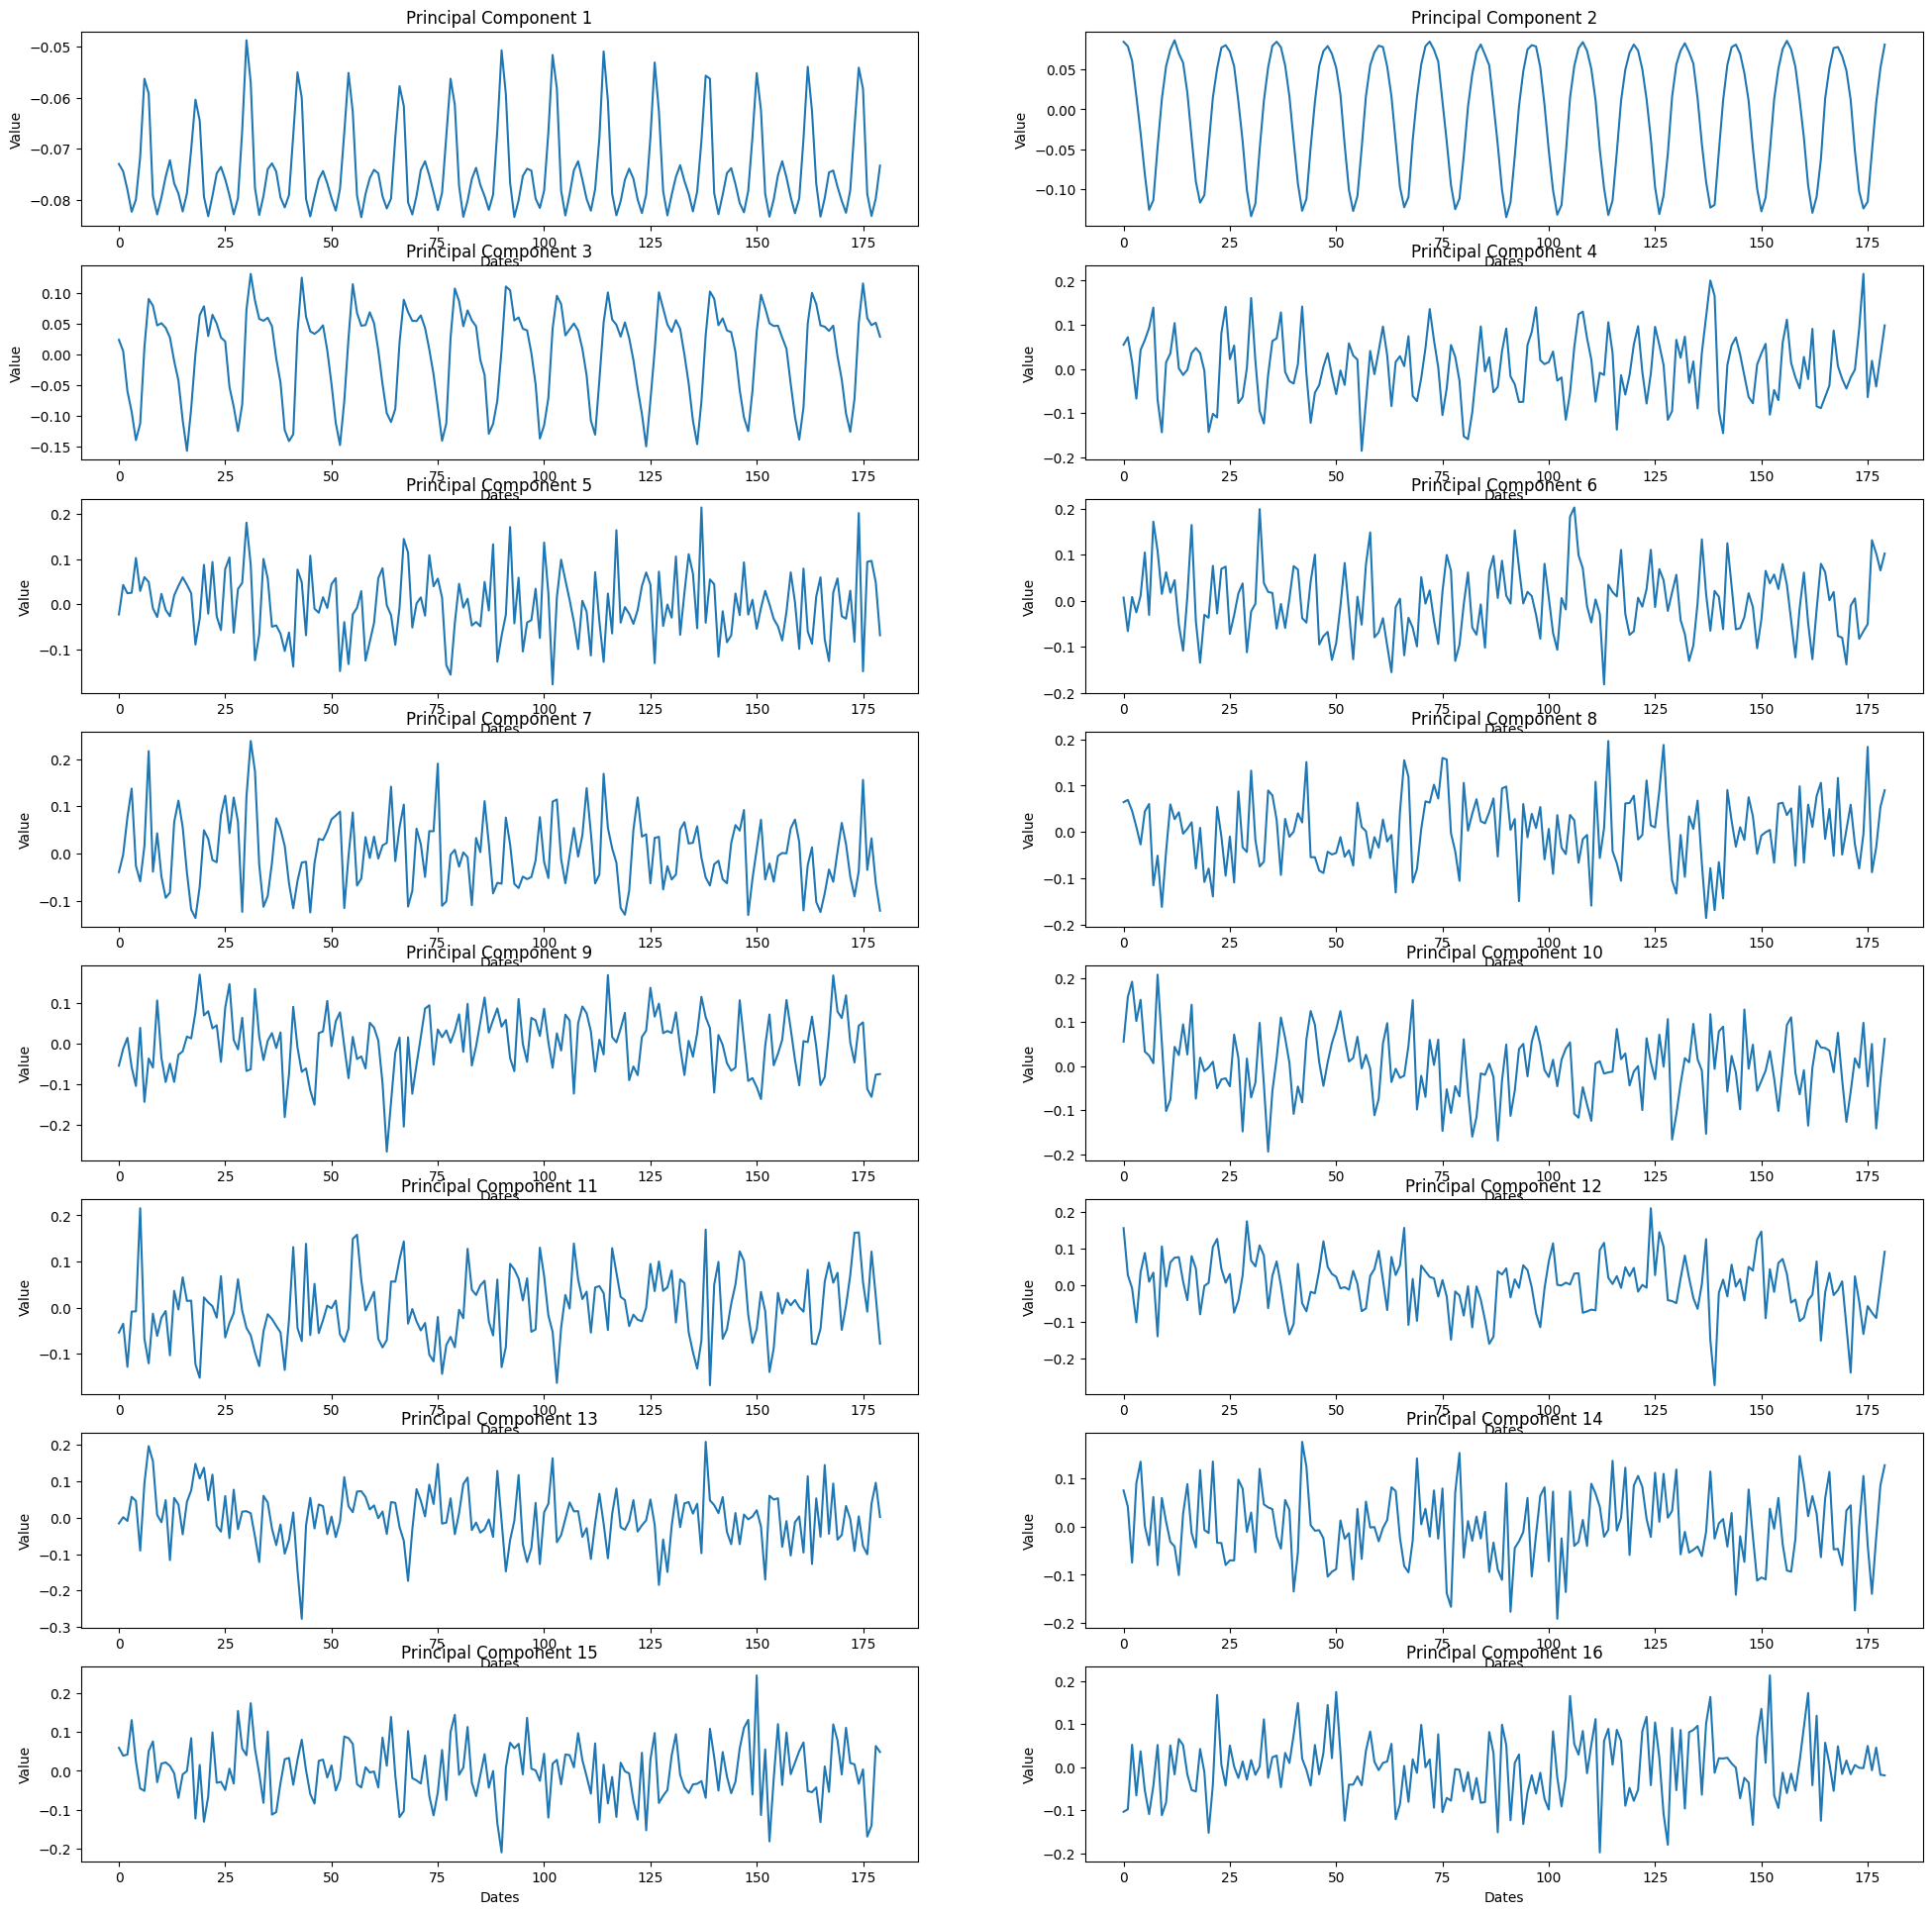

In [ ]:
eigenvalues, eigenvectors = get_sorted_eigen(df_cov)

plt.figure(figsize = (24,24))
for i in range(16):
    plt.subplot(8, 2, i+1)

    plt.plot(eigenvectors[:,i])

    plt.title(f'Principal Component {i+1}')
    plt.xlabel('Dates')
    plt.ylabel('Value')

## Q6

By observing the first two PCs, I found that the first two graphs show very regular and periodic patterns, and graphs of the rest PCs become more and more complex and less periodic. The graph of PC1 shows a high-frequency pattern, and PC2 shows a regular pattern but with a lower frequency compared to PC1. They have the highest variance compare with the rest. The rest of the PCs capture less variations in the dataset.

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a city and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigenvectors and eigenvalues.
*   Plots 4 figures:
  1.   The original time-series for the specified city. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified city in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable):
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each month `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error.
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the `Yakeshi`, `Zamboanga`, `Norilsk`, `Juliaca`, and `Doha` as inputs. **[0.5]**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def plot_city_figures(original_df, city_name):
    ### YOUR CODE HERE ###

    dates = original_df.columns
    city_index = original_df.index.get_loc(city_name)
    original = original_df.values

    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(original)

    df_mean = np.mean(df_scaled, axis=0)
    df_cov = (df_scaled - df_mean).T.dot((df_scaled - df_mean)) / (df_scaled.shape[0]-1)

    eigenvalues, eigenvectors = get_sorted_eigen(df_cov)

    # Q1
    plt.figure()
    plt.plot(dates, original[city_index,:])
    plt.title(f'Original Time-Series For The City {city_name}')
    plt.xticks(np.arange(1,len(dates)+1,10))
    plt.xticks(rotation = 90)
    plt.xlabel('Date')
    plt.ylabel('Temperature')

    # Q2
    plt.figure()
    plt.title(f'Incremental Reconstruction Time-Series For The City {city_name}')
    for i in [1,2,4,8,16]:
        W = eigenvectors[:, 0:i]
        projected = np.dot(df_scaled, W)
        reconstructed = np.dot(projected, W.T)
        reconstructed = scaler.inverse_transform(reconstructed)
        plt.plot(dates, reconstructed[city_index,:], label = f'{i} PCs')
    plt.xticks(np.arange(1,len(dates)+1,10))
    plt.xticks(rotation = 90)
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Temperature')

    # Q3 & Q4
    rmse = np.zeros(10)
    min_rmse = np.inf
    min_re = []
    for i in range(10):
        W = eigenvectors[:, 0:i]
        projected = np.dot(df_scaled, W)
        reconstructed = np.dot(projected, W.T)
        reconstructed = scaler.inverse_transform(reconstructed)
        residual_error = original[city_index,:] - reconstructed[city_index,:]
        rmse[i] = mean_squared_error(original[city_index,:], reconstructed[city_index,:], squared=False)
        if rmse[i] < min_rmse:
            min_re = residual_error
    plt.figure()
    plt.plot(dates, min_re)
    plt.title(f'Residual Error Of Best Reconstruction For The City {city_name}')
    plt.xticks(np.arange(1,len(dates)+1,10))
    plt.xticks(rotation = 90)
    plt.xlabel('Date')
    plt.ylabel('Residual Error')


    plt.figure()
    plt.plot(range(10), rmse)
    plt.title(f'RMSE Of The Reconstruction For The City {city_name}')
    plt.xlabel('Number Of Components')
    plt.ylabel('RMSE')

In [ ]:
original_df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/TemperaturesbyCity.csv',
    index_col=0
)

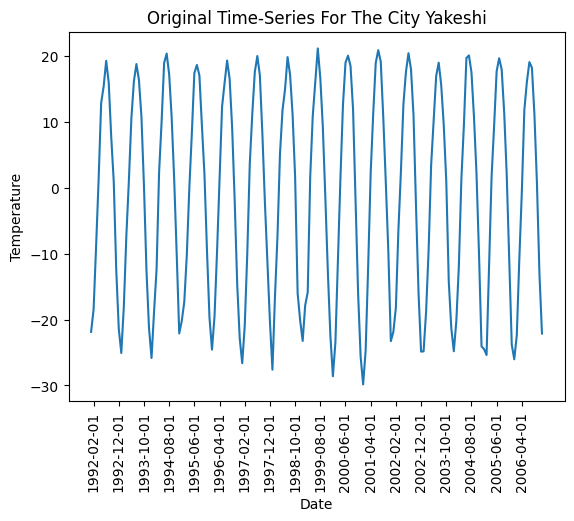

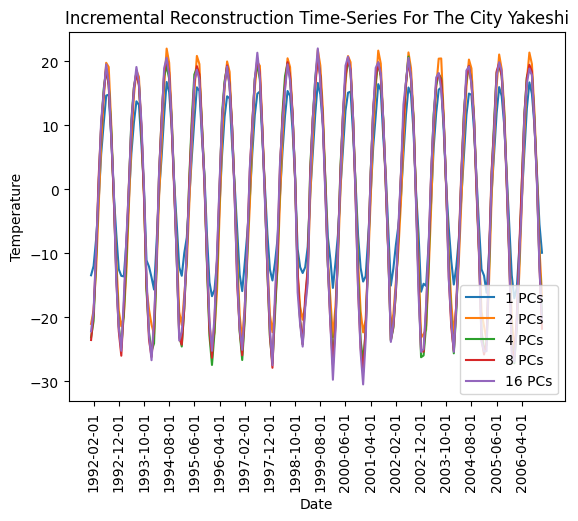

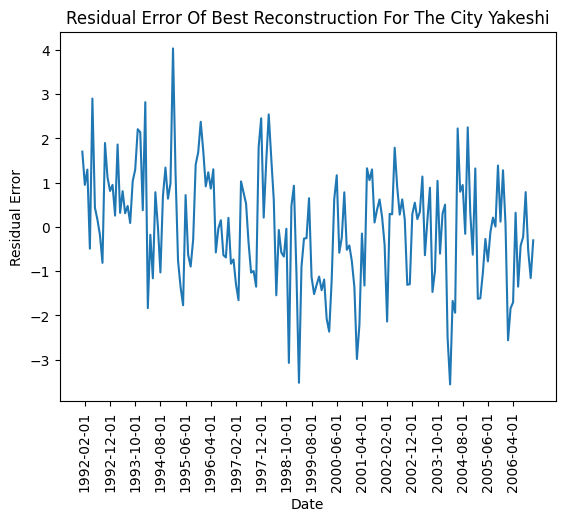

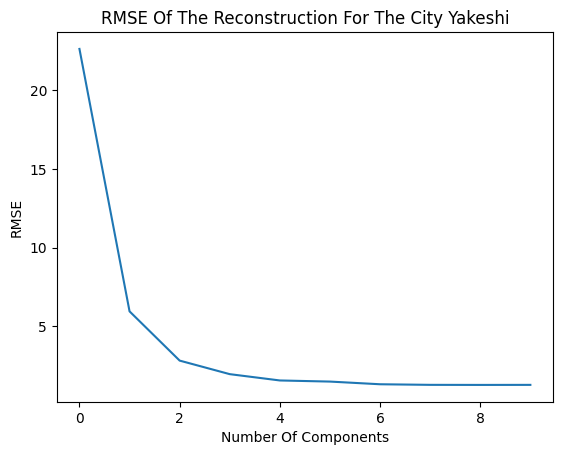

In [ ]:
plot_city_figures(original_df, 'Yakeshi')

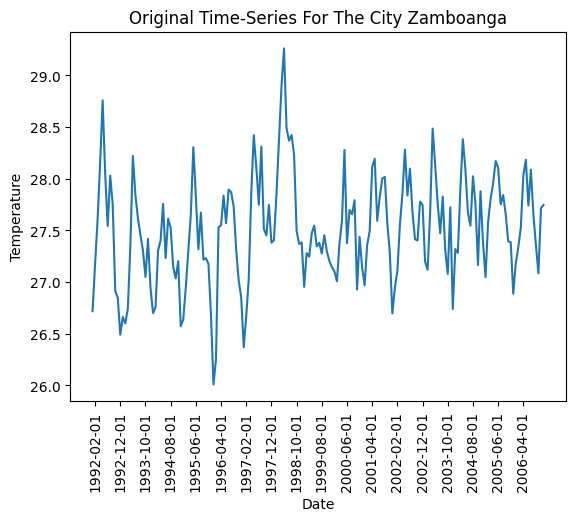

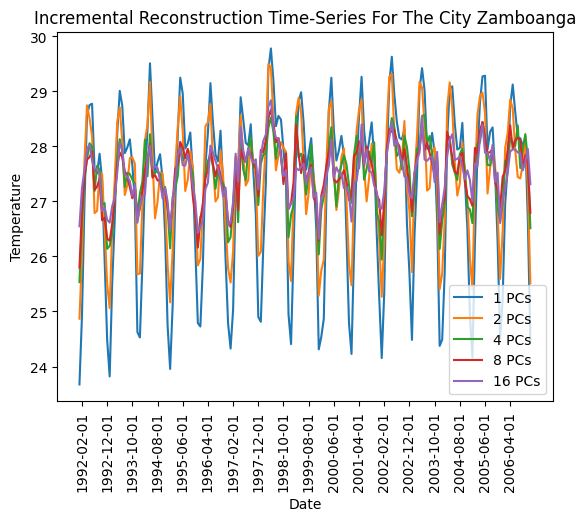

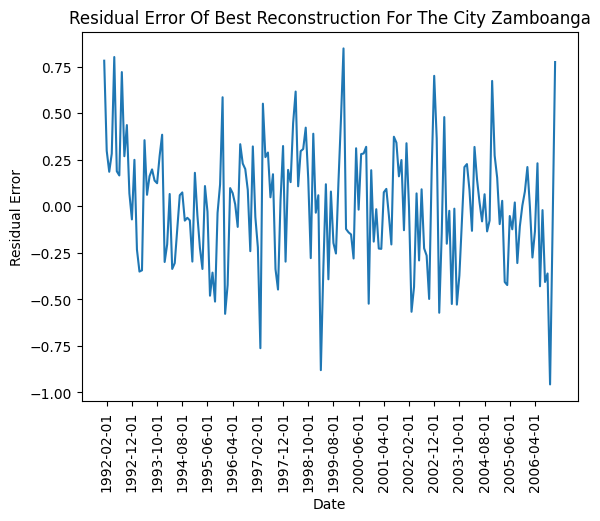

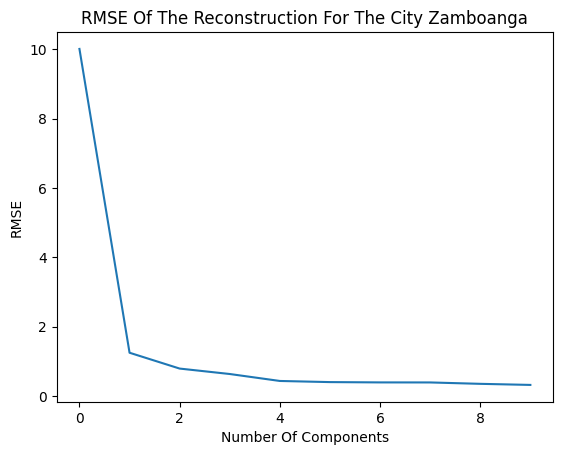

In [ ]:
plot_city_figures(original_df, 'Zamboanga')

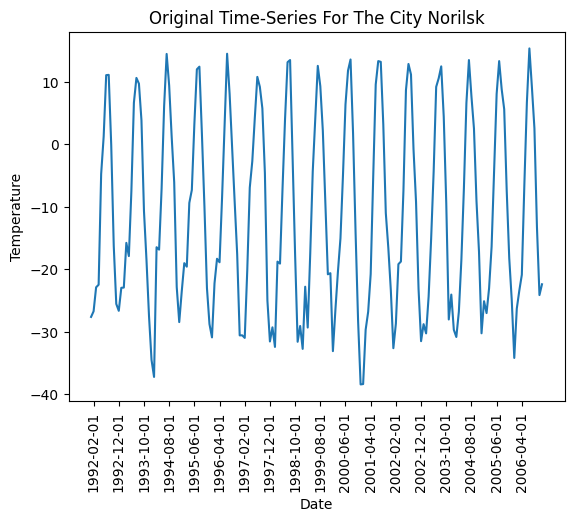

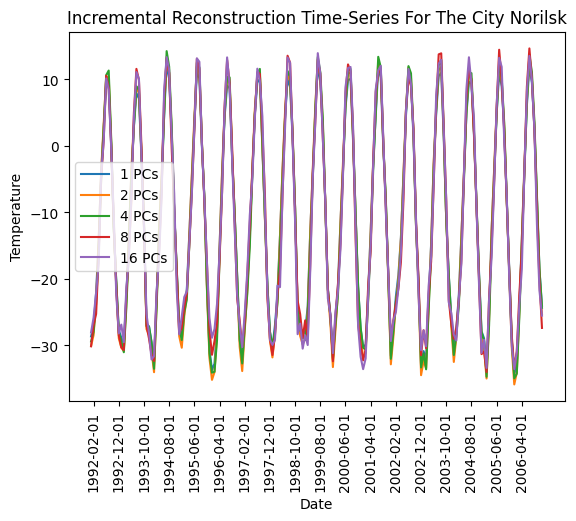

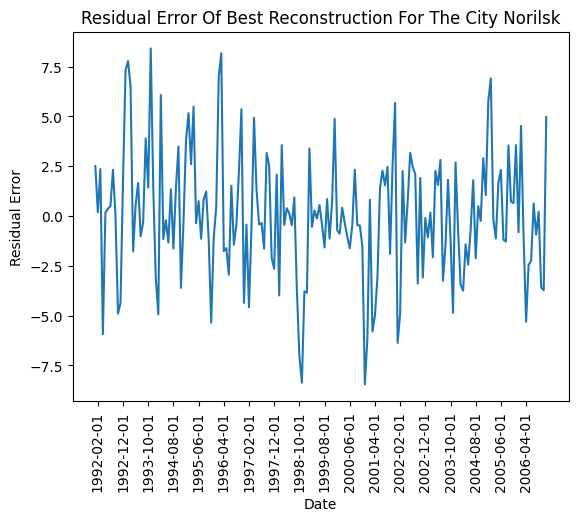

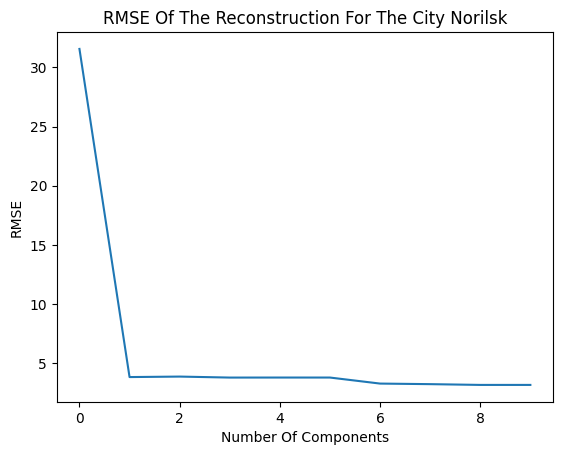

In [ ]:
plot_city_figures(original_df, 'Norilsk')

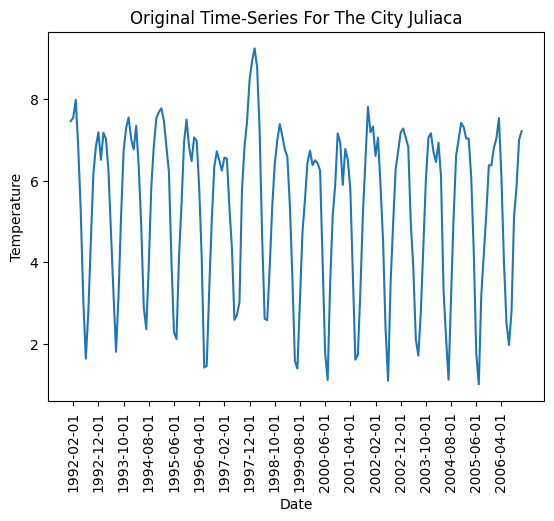

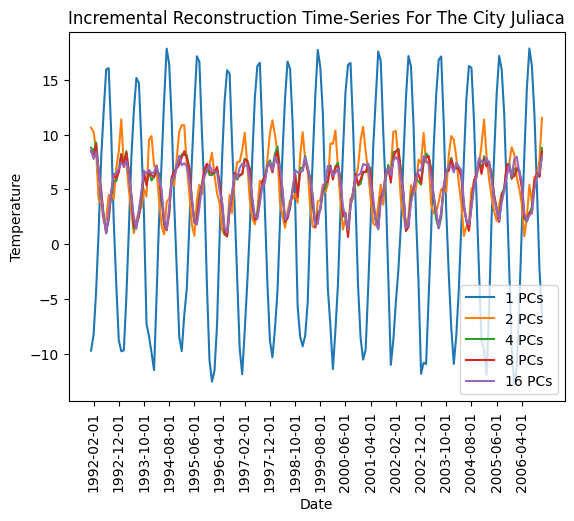

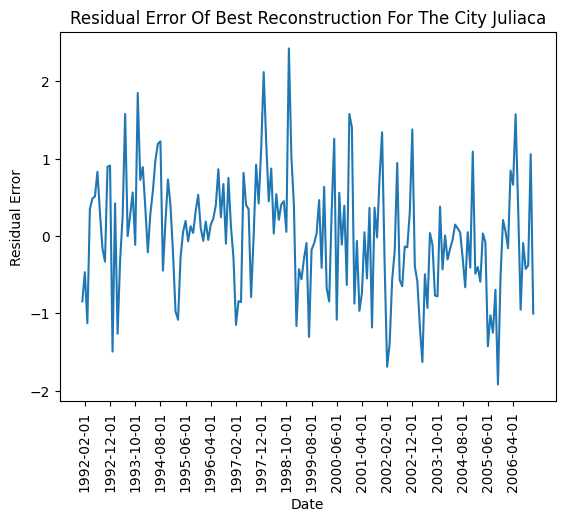

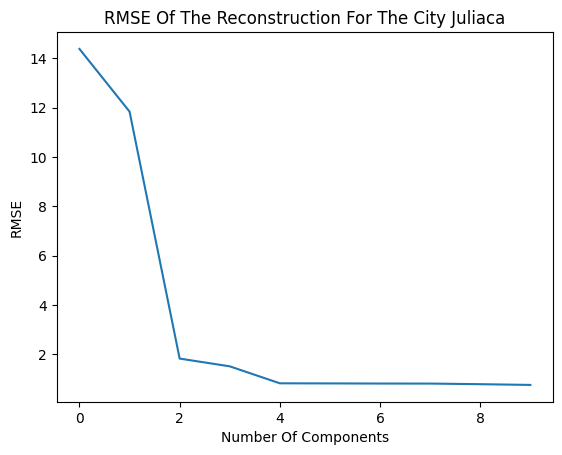

In [ ]:
plot_city_figures(original_df, 'Juliaca')

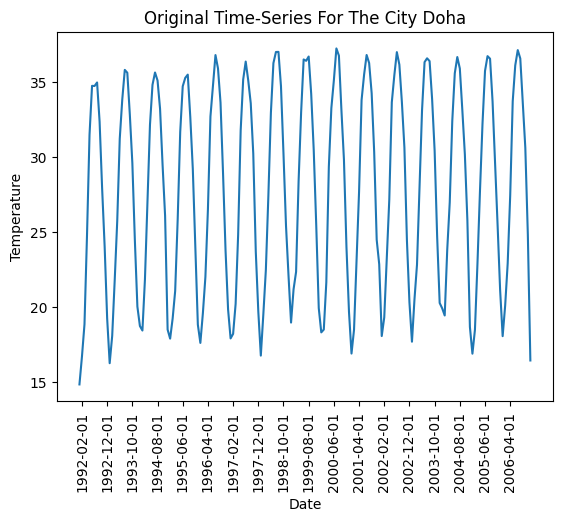

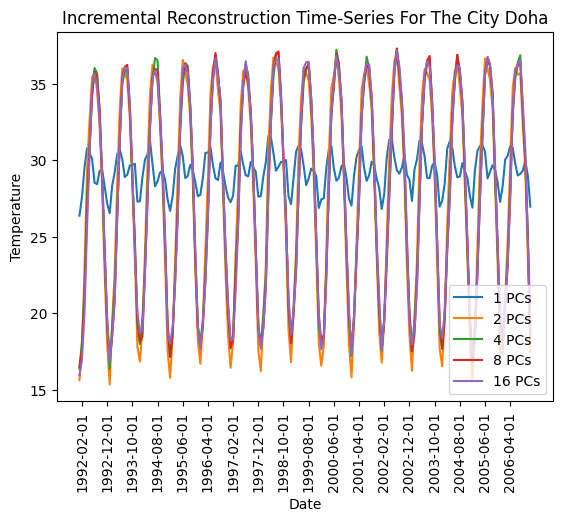

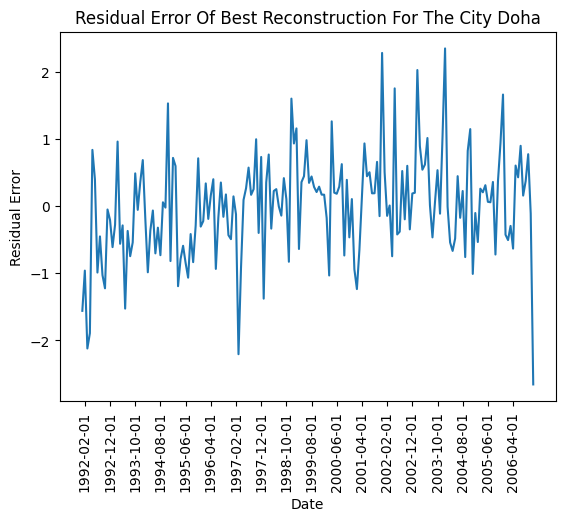

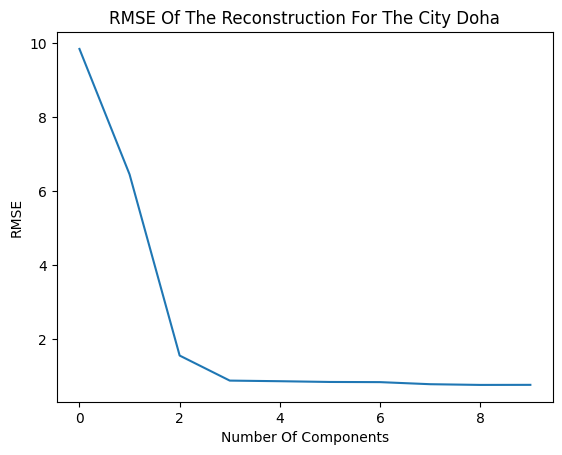

In [ ]:
plot_city_figures(original_df, 'Doha')

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. Write a function to make this comparison **[0.5]**, and comment on the results. **[0.5]**.

In [ ]:
### YOUR CODE HERE ###
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

def plot_city_figures_svd(original_df, city_name):
    ### YOUR CODE HERE ###

    dates = original_df.columns
    city_index = original_df.index.get_loc(city_name)
    original = original_df.values

    U, S, Vh = np.linalg.svd(original)

    # Q1
    plt.figure()
    plt.plot(dates, original[city_index,:])
    plt.title(f'Original Time-Series For The City {city_name}')
    plt.xticks(np.arange(1,len(dates)+1,10))
    plt.xticks(rotation = 90)
    plt.xlabel('Date')
    plt.ylabel('Temperature')

    # Q2
    plt.figure()
    plt.title(f'Incremental Reconstruction Time-Series For The City {city_name}')
    for i in [1,2,4,8,16]:
        reconstructed = (U[:, 0:i]*S[0:i])@Vh[0:i,:]
        plt.plot(dates, reconstructed[city_index,:], label = f'{i} PCs')
    plt.xticks(np.arange(1,len(dates)+1,10))
    plt.xticks(rotation = 90)
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Temperature')

    # Q3 & Q4
    rmse = np.zeros(10)
    min_rmse = np.inf
    min_re = []
    for i in range(10):
        W = U[:, 0:i]
        reconstructed = (U[:, 0:i]*S[0:i])@Vh[0:i,:]
        residual_error = original[city_index,:] - reconstructed[city_index,:]
        rmse[i] = mean_squared_error(original[city_index,:], reconstructed[city_index,:], squared=False)
        if rmse[i] < min_rmse:
            min_re = residual_error
    plt.figure()
    plt.plot(dates, min_re)
    plt.title(f'Residual Error Of Best Reconstruction For The City {city_name}')
    plt.xticks(np.arange(1,len(dates)+1,10))
    plt.xticks(rotation = 90)
    plt.xlabel('Date')
    plt.ylabel('Residual Error')


    plt.figure()
    plt.plot(range(10), rmse)
    plt.title(f'RMSE Of The Reconstruction For The City {city_name}')
    plt.xlabel('Number Of Components')
    plt.ylabel('RMSE')

In [ ]:
original_df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/TemperaturesbyCity.csv',
    index_col=0
)

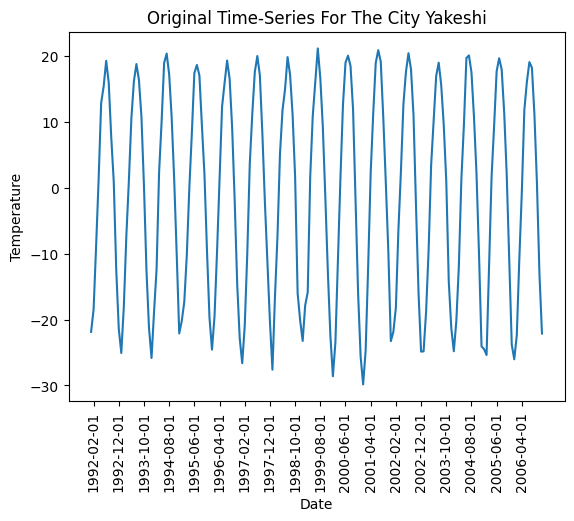

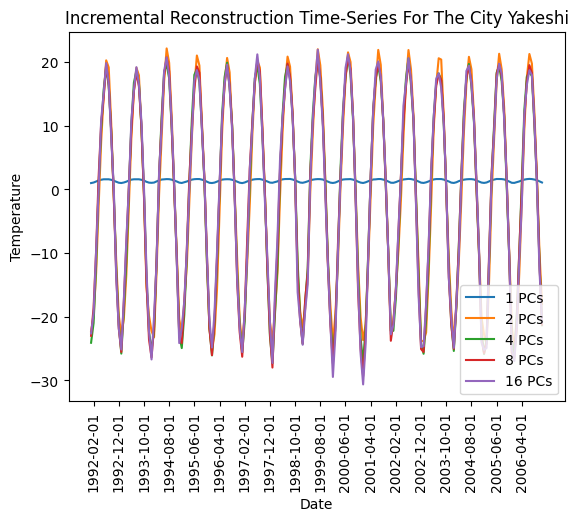

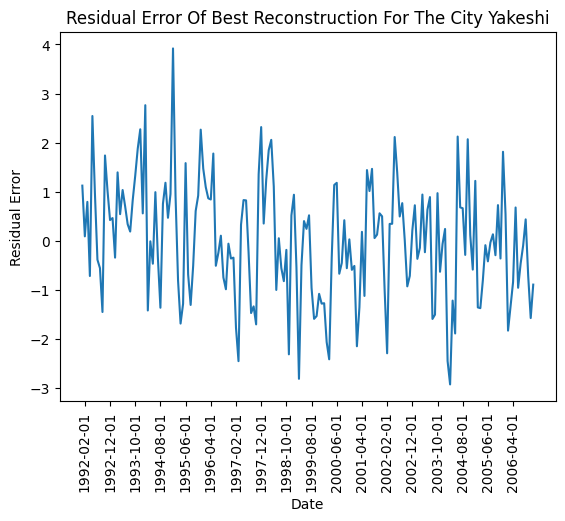

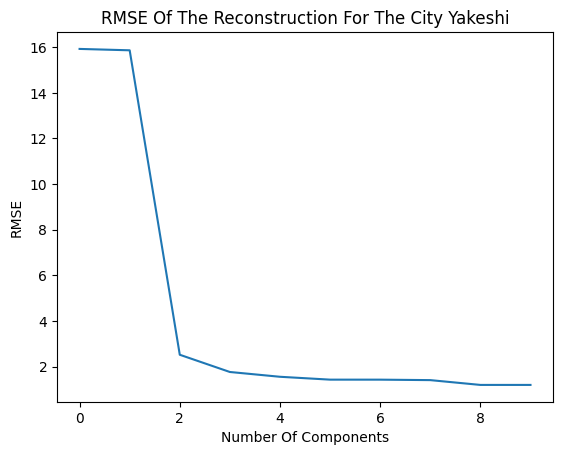

In [ ]:
plot_city_figures_svd(original_df, 'Yakeshi')

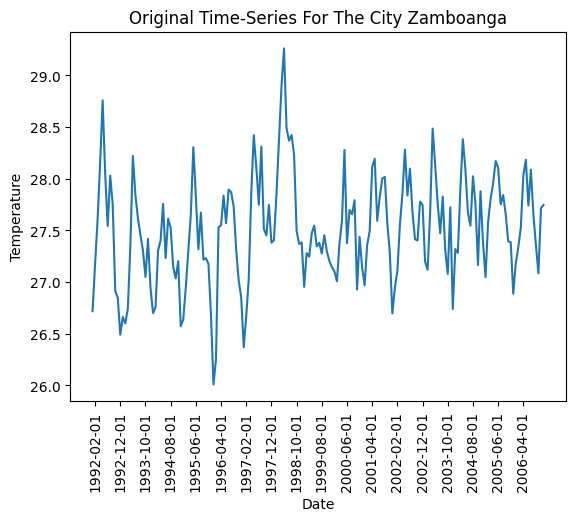

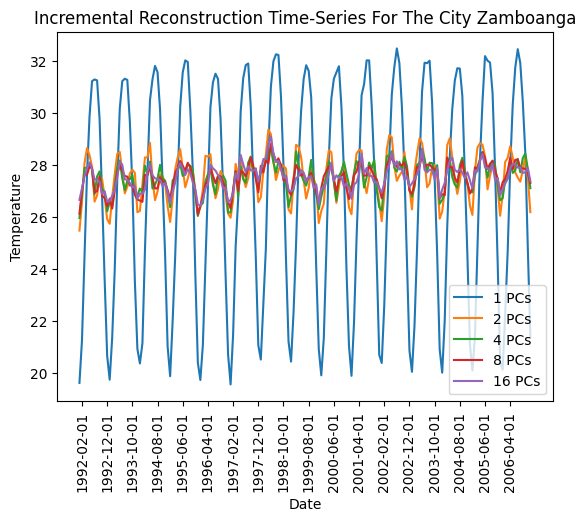

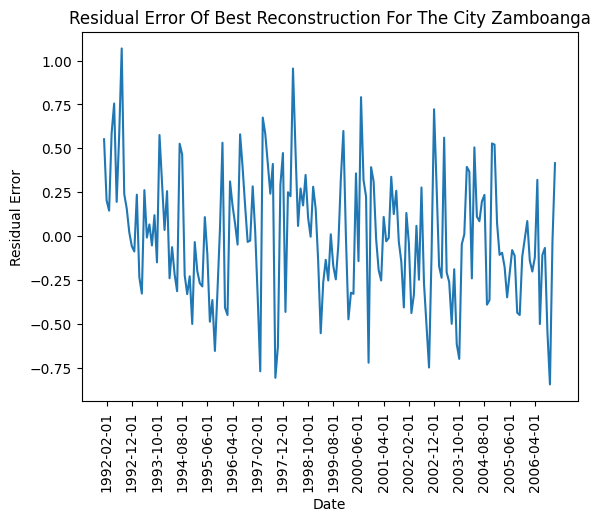

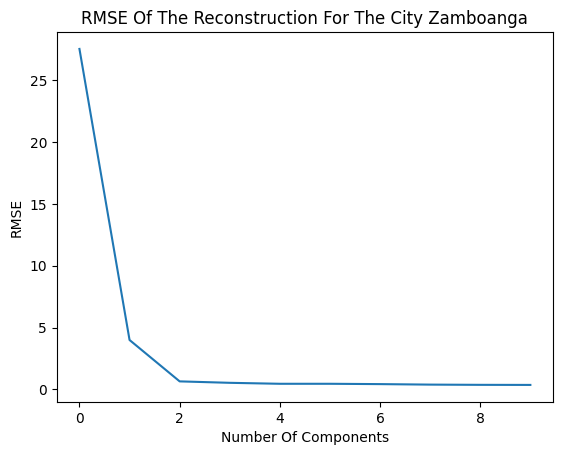

In [ ]:
plot_city_figures_svd(original_df, 'Zamboanga')

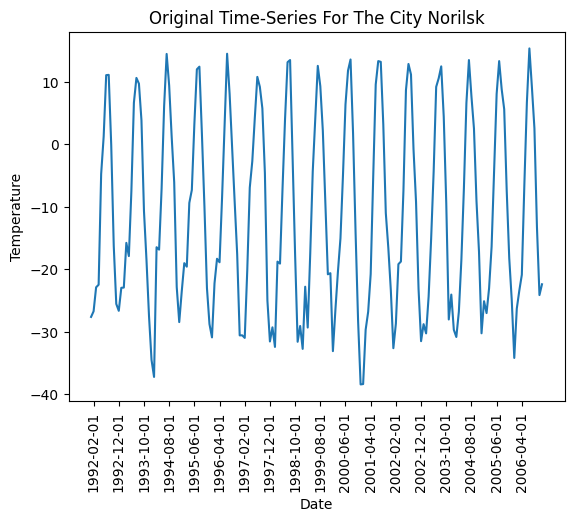

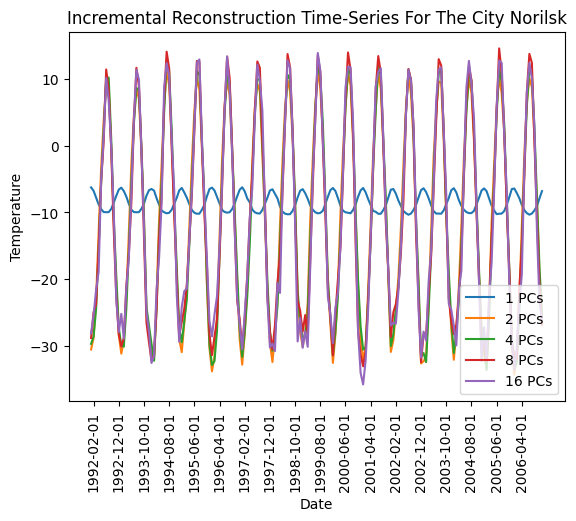

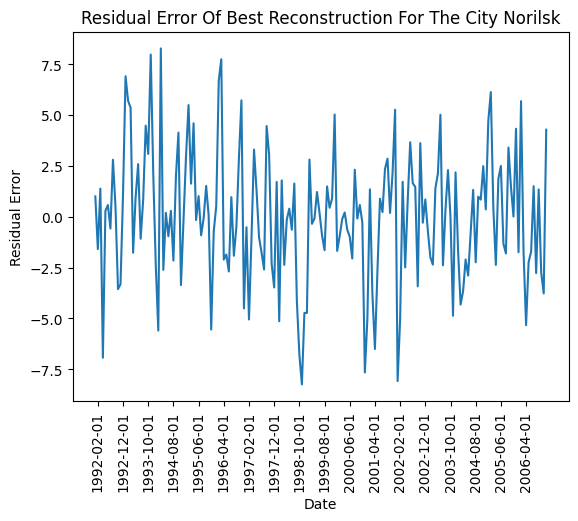

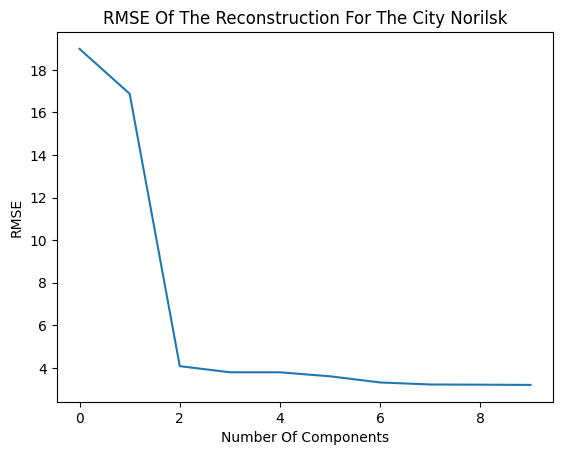

In [ ]:
plot_city_figures_svd(original_df, 'Norilsk')

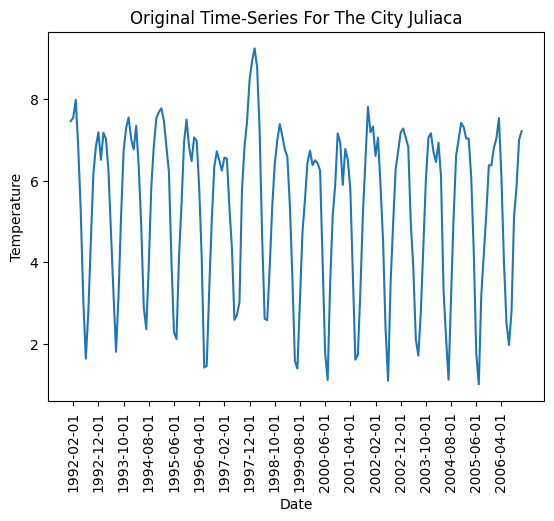

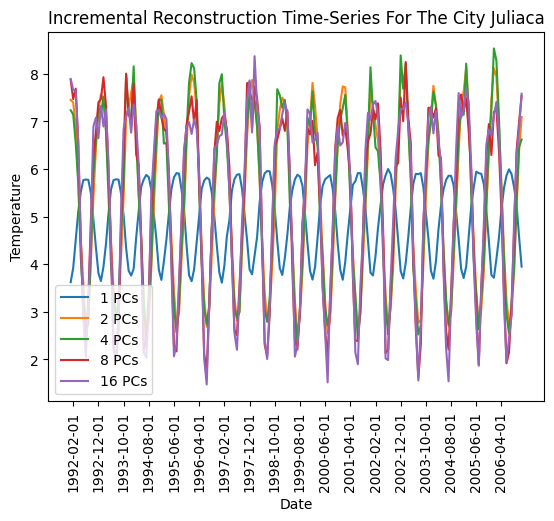

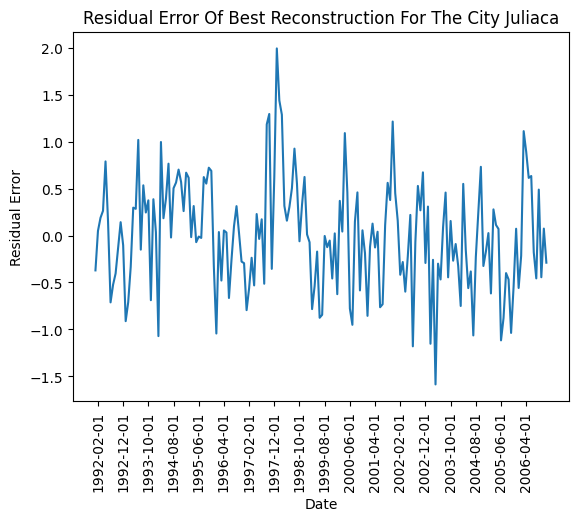

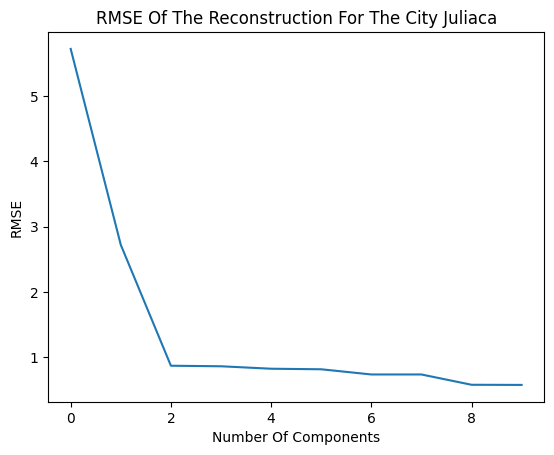

In [ ]:
plot_city_figures_svd(original_df, 'Juliaca')

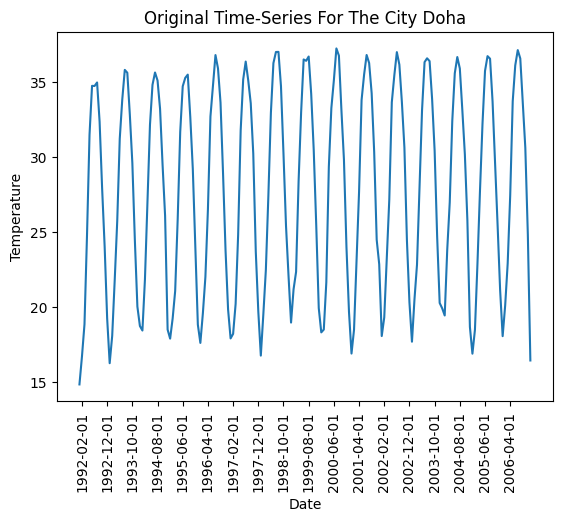

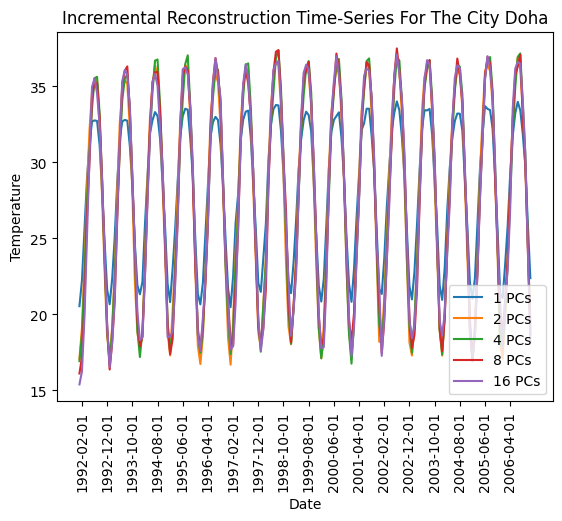

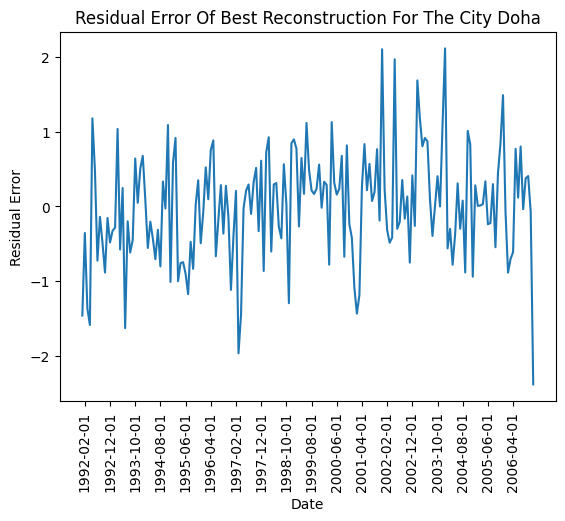

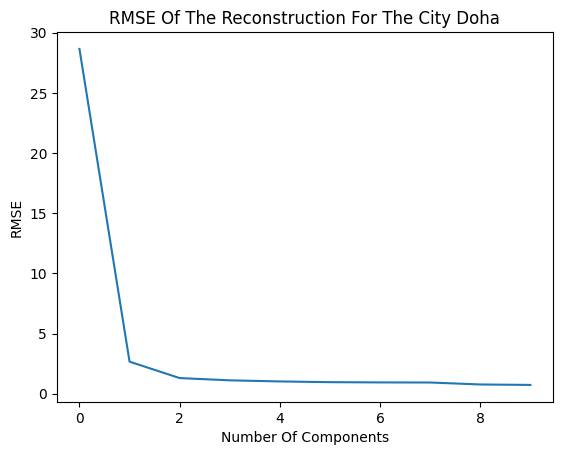

In [ ]:
plot_city_figures_svd(original_df, 'Doha')

In this part, standardization and covariance are not required. In the time series of temperature among city, standardization is not be necessary because they don't need to be converted to the same scale. The covariance is not needed when using SVD, because it is applied directly to the data matrix. And SVD decomposes the data matrix A into three matrices.

Compare the result from SVD and PCA, I found some differences. The result from SVD decomposes the original data matrix into three matrice contain singular vectors. The original graphs and the residual error graphs are exactly the same as the PCA graphs. But the incremental reconstruction graphs and RMSE graphs are different from the PCA graphs. When only using the first PC, the SVD is less fluctuation. The direction of the maximum variance is less since SVD decomposes to singular vectors.

# Part 5: Let's collect another dataset! [2 Marks]
Create another dataset similar to the one provided in your handout using the raw information on average temperatures per states (not cities) provided [here](https://github.com/Sabaae/Dataset/blob/main/TemperaturesbyState.csv). **[1]**

You need to manipulate the data to organize it in the desired format (i.e., the same format that was in previous parts). If there is a missing value for the average temperature of a particular state at a given date, make sure to remove that date completely from the dataset, even if the data of that specific date exists for other states.

You are free to use any tools you like, from Excel to Python! In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. How many features does the final dataset have? How many states are there?


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. When analyzing the states, you may use `Jilin`, `Nunavut`, `Rio Grande Do Norte`, `Louisiana`, and `Tasmania`. **[1]**


The code below helps you to upload your new CSV file to your colab session.

In [ ]:
# load train.csv to Google Colab
from google.colab import files
uploaded = files.upload()

In [ ]:
### YOUR CODE HERE ###
import pandas as pd
df_state= pd.read_csv('TemperaturesbyState.csv')
df_state= df_state.dropna()
df_state= df_state.drop('AverageTemperatureUncertainty', axis=1)
df= df_state.drop('Country',axis=1)

pivot_df = df.pivot_table(index='State', columns='dt', values='AverageTemperature')

df = pivot_df.dropna(axis=1)
print(df)


dt          1963-01-01  1963-02-01  1963-03-01  1963-04-01  1963-05-01  \
State                                                                    
Acre            26.037      25.659      25.506      26.019      25.675   
Adygey          -1.260       2.380       1.506       8.992      15.204   
Aga Buryat     -22.297     -16.490      -6.900      -1.146       8.558   
Alabama          4.234       5.685      14.853      18.815      22.172   
Alagoas         26.389      26.215      25.830      25.340      24.060   
...                ...         ...         ...         ...         ...   
Yaroslavl'     -18.650     -12.679     -12.197       2.414      15.048   
Yevrey         -20.697     -17.472      -6.148       2.557      10.782   
Yukon          -24.129     -19.783     -17.878      -6.328       3.664   
Yunnan           7.286      10.041      13.768      17.398      20.858   
Zhejiang         2.765       5.534      11.229      16.736      22.544   

dt          1963-06-01  1963-07-01  1

There are 240 states and 2 features.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

def plot_state_figures_svd(original_df, state_name):
    ### YOUR CODE HERE ###

    dates = original_df.columns
    state_index = original_df.index.get_loc(state_name)
    original = original_df.values

    U, S, Vh = np.linalg.svd(original)

    # Q1
    plt.figure()
    plt.plot(dates, original[state_index,:])
    plt.title(f'Original Time-Series For The State {state_name}')
    plt.xticks(np.arange(1,len(dates)+1,10))
    plt.xticks(rotation = 90)
    plt.xlabel('Date')
    plt.ylabel('Temperature')

    # Q2
    plt.figure()
    plt.title(f'Incremental Reconstruction Time-Series For The State {state_name}')
    for i in [1,2,4,8,16]:
        reconstructed = (U[:, 0:i]*S[0:i])@Vh[0:i,:]
        plt.plot(dates, reconstructed[state_index,:], label = f'{i} PCs')
    plt.xticks(np.arange(1,len(dates)+1,10))
    plt.xticks(rotation = 90)
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Temperature')

    # Q3 & Q4
    rmse = np.zeros(10)
    min_rmse = np.inf
    min_re = []
    for i in range(10):
        W = U[:, 0:i]
        reconstructed = (U[:, 0:i]*S[0:i])@Vh[0:i,:]
        residual_error = original[state_index,:] - reconstructed[state_index,:]
        rmse[i] = mean_squared_error(original[state_index,:], reconstructed[state_index,:], squared=False)
        if rmse[i] < min_rmse:
            min_re = residual_error
    plt.figure()
    plt.plot(dates, min_re)
    plt.title(f'Residual Error Of Best Reconstruction For The State {state_name}')
    plt.xticks(np.arange(1,len(dates)+1,10))
    plt.xticks(rotation = 90)
    plt.xlabel('Date')
    plt.ylabel('Residual Error')


    plt.figure()
    plt.plot(range(10), rmse)
    plt.title(f'RMSE Of The Reconstruction For The State {state_name}')
    plt.xlabel('Number Of Components')
    plt.ylabel('RMSE')

In [ ]:
original_df = df

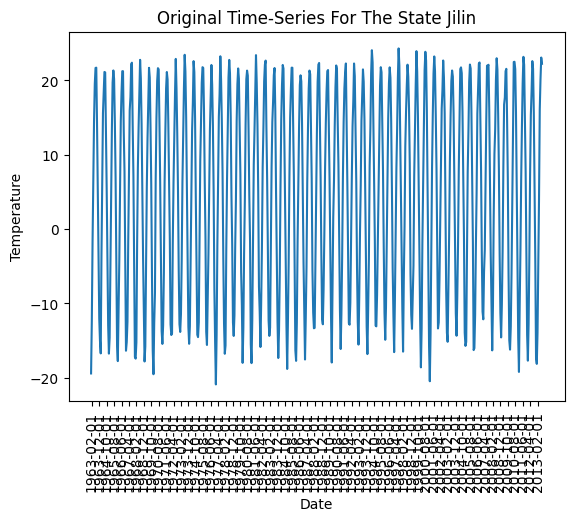

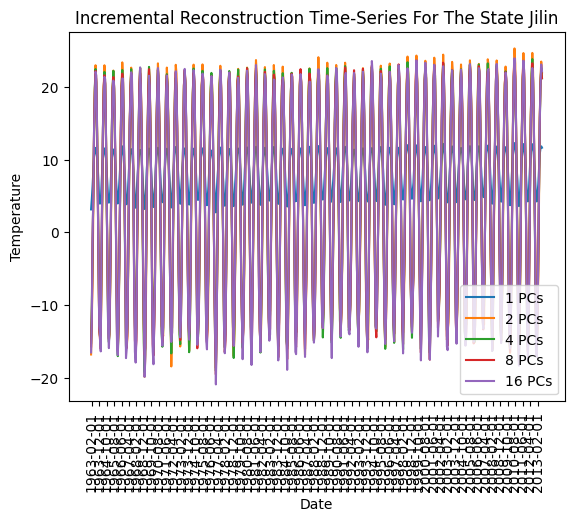

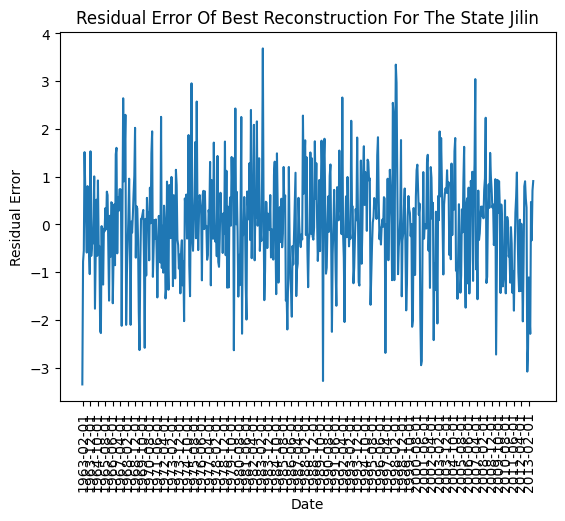

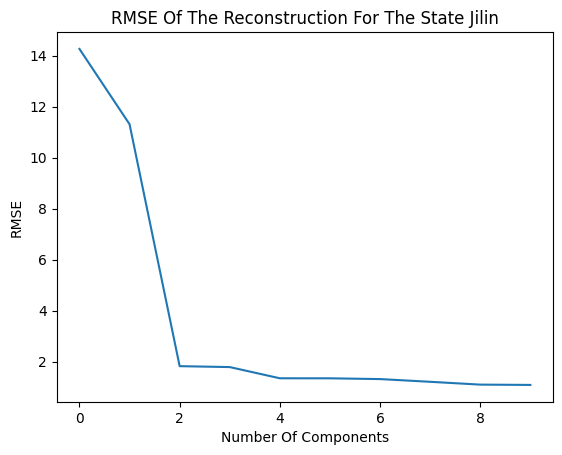

In [ ]:
plot_state_figures_svd(original_df, 'Jilin')

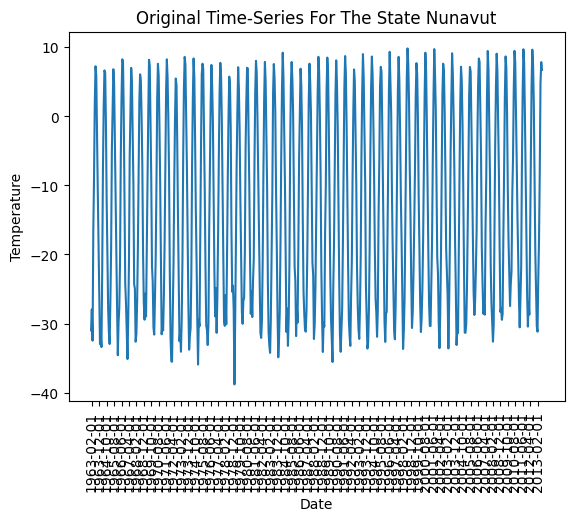

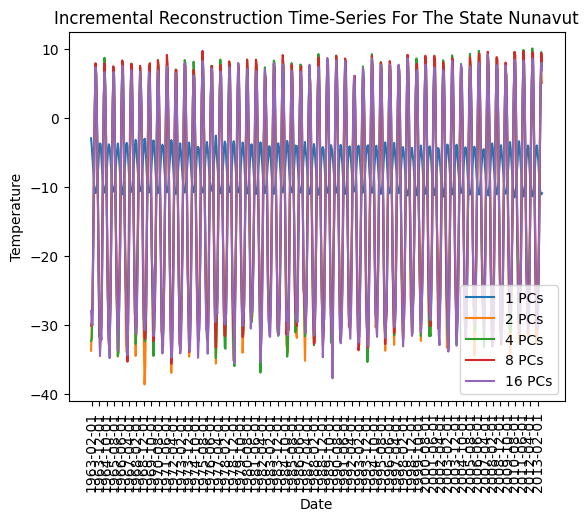

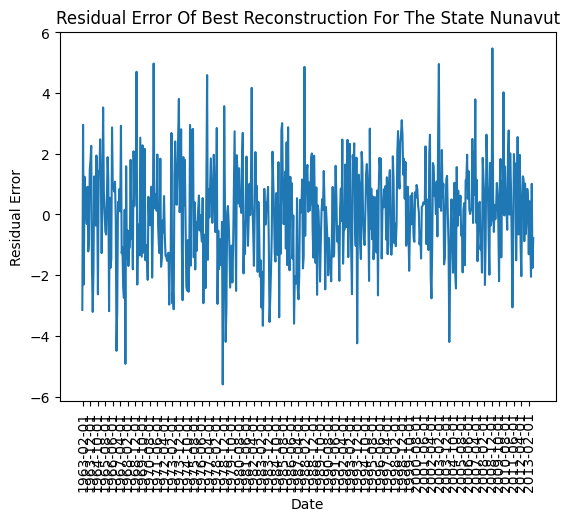

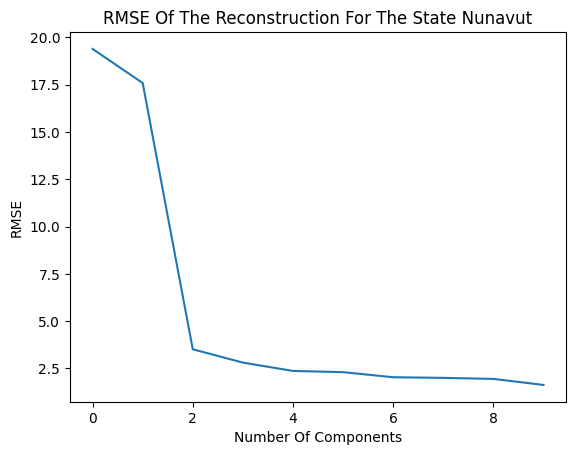

In [ ]:
plot_state_figures_svd(original_df, 'Nunavut')

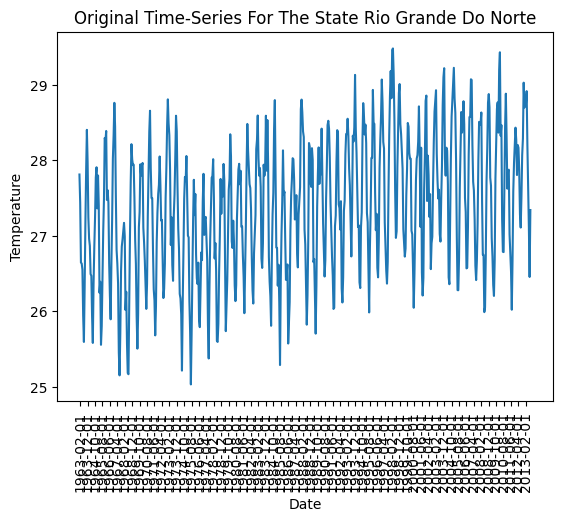

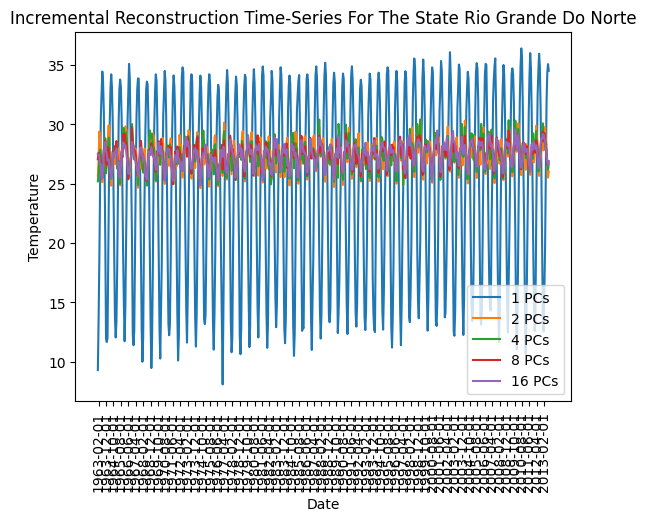

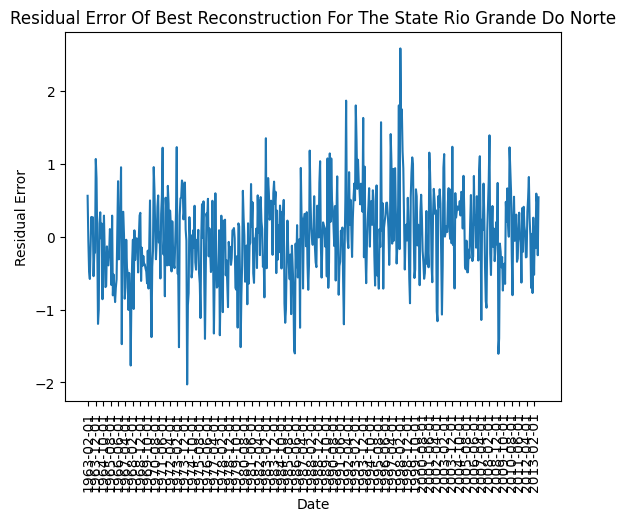

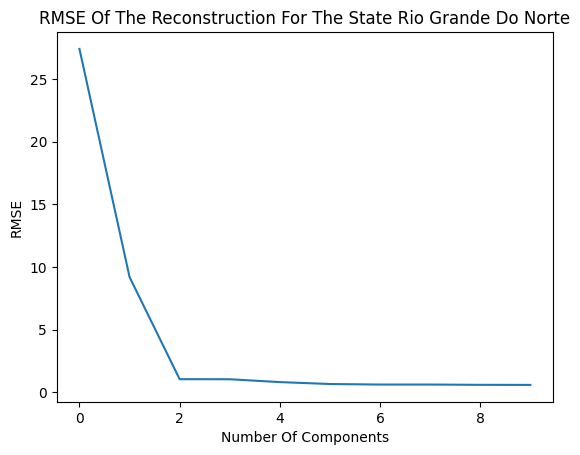

In [ ]:
plot_state_figures_svd(original_df, 'Rio Grande Do Norte')

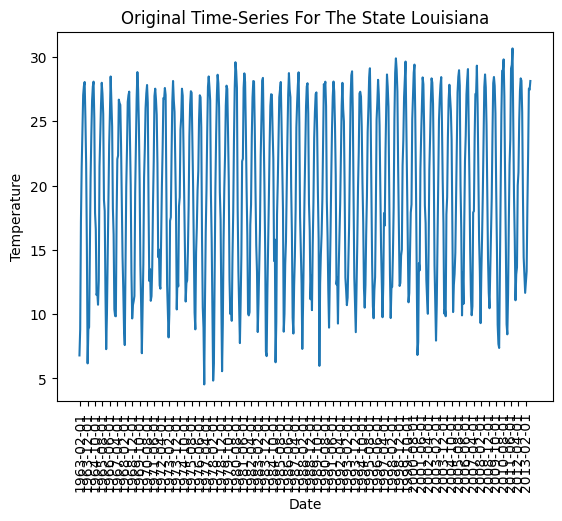

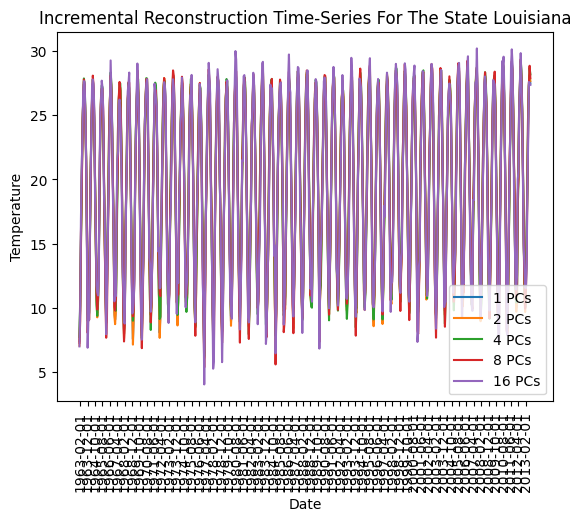

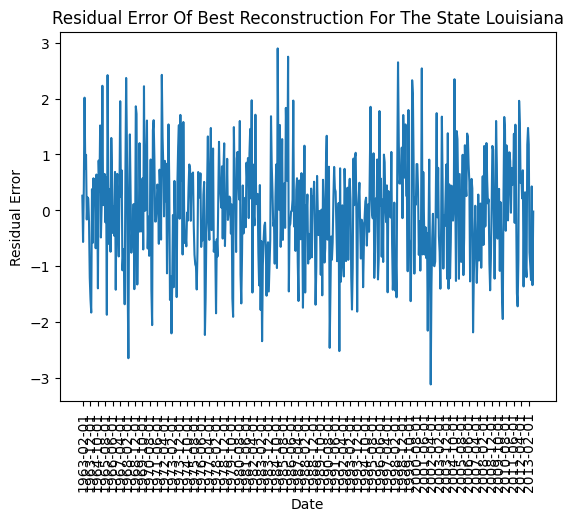

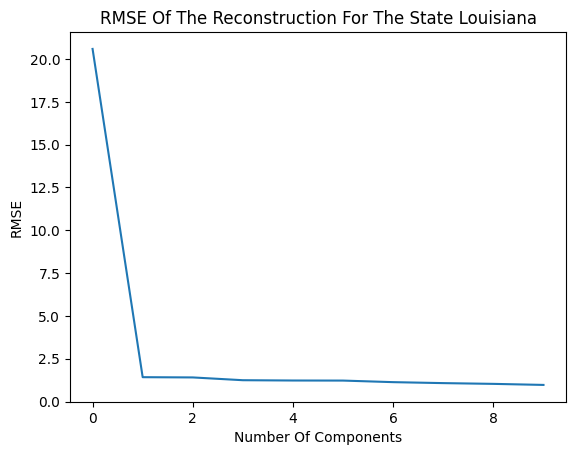

In [ ]:
plot_state_figures_svd(original_df, 'Louisiana')

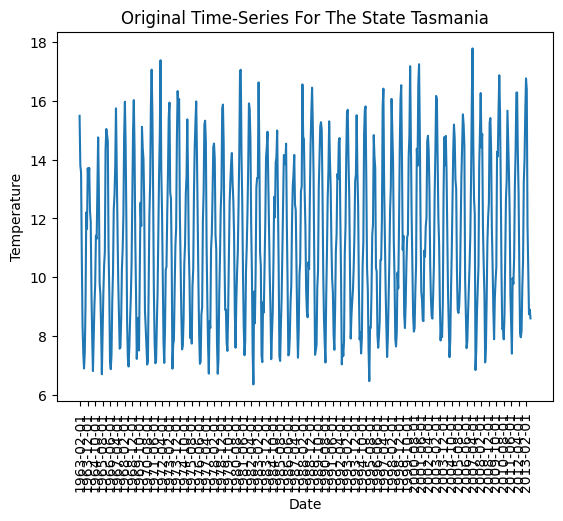

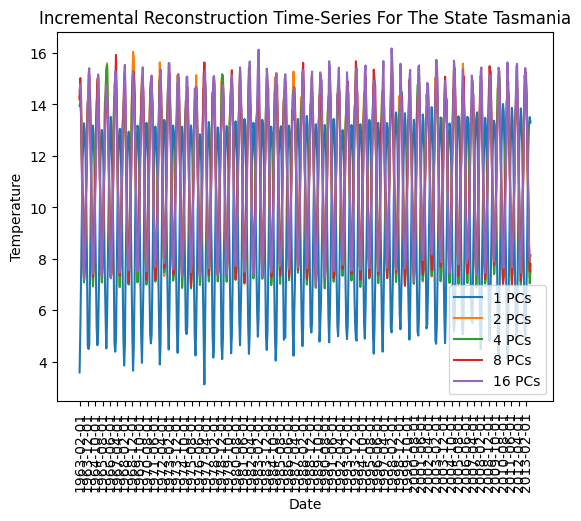

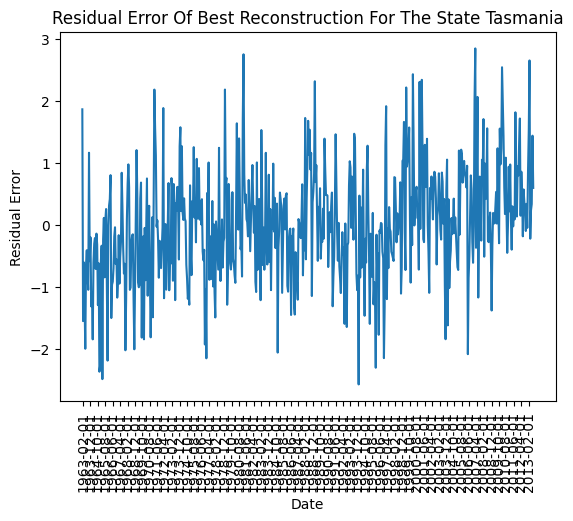

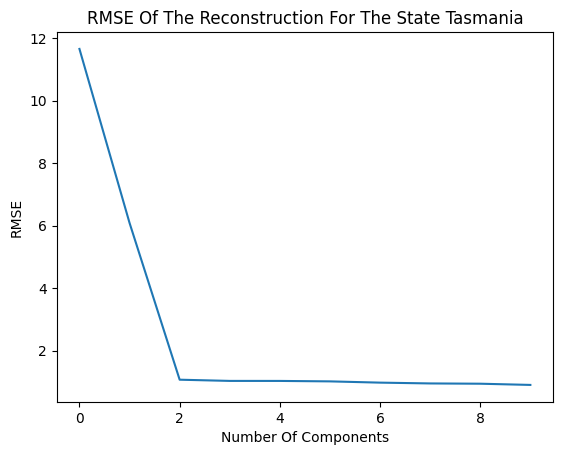

In [ ]:
plot_state_figures_svd(original_df, 'Tasmania')

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Temperature Data:

1. https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

2. https://berkeleyearth.org/data/

